<a href="https://colab.research.google.com/github/andreas-berg/colab/blob/main/maasulku_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Maasulku | U0   | U12 (alku) | U23 | U31 | U12 (loppu) | U23 | U31 | U1  | U2  | U3   | I1=IR | I2=IS | I3=IT | I0   | IeC  | Ie   | Ir  |
|----------|------|-------------|-----|-----|--------------|-----|-----|-----|-----|------|--------|--------|--------|------|------|------|-----|
| 3.2.     | 0.5  | 237         | 218 | 219 | 219          | 221 | 220 | 227 | 126 | 128  | 0.33   | 0.34   | 0.34   |      |      |      |     |
| 3.31.    | 130  | 217         | 219 | 218 | 219          | 226 | 222 | 222 | 225 | 0.08 | 0.58   | 0.6    | 1.04   | 0    | 1.04 | 1.04 |     |
| 3.32.    | 125  | 217         | 218 | 218 | 219          | 220 | 219 | 219 | 219 | 0.03 | 0.57   | 0.59   | 0.33   | 1.02 | 1.01 | 0.33 |     |
| 3.41.    | 47.8 | 217         | 218 | 218 | 219          | 221 | 218 | 103 | 174 | 118  | 0.27   | 0.46   | 0.48   | 0.02 | 0.37 | 0.37 |     |
| 3.42.    | 95.8 | 217         | 218 | 217 | 218          | 220 | 219 | 199 | 188 | 31.8 | 0.51   | 0.49   | 0.16   | 0.78 | 0.74 | 0.11 |     |
| 3.5.     |      |             |     |     |              |     |     |     |     |      |        |        |        |      |      |      |     |


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def voltage_vector_alignment_plot(U_data, U_prime_data, state, title="Tapaus"):
    """
    Piirtää alkuperäiset jännitevektorit ja optimoidut vektorit, jotka osoittavat yhteiseen leikkauspisteeseen.

    Parametrit:
    - U_data: sanakirja alkuperäisistä vektoreista. Muoto: {"tunniste": (pituus, kulma_asteina)}
    - U_prime_data: sanakirja muokatuista vektoreista. Muoto: {"tunniste": (viitetunniste, uusi_pituus)}
    - title: valinnainen otsikko kuvalle
    """

    def plot_vector(ax, start, end, label, color='black', marker=False): # Piirtää yksittäisen vektorin
        vector = np.array(end) - np.array(start)
        ax.quiver(*start, *vector, angles='xy', scale_units='xy', scale=1, color=color)
        mid_point = (np.array(start) + np.array(end)) / 2
        ax.text(mid_point[0], mid_point[1], label, fontsize=12, verticalalignment='bottom', color=color)
        if marker:
            ax.scatter(*start, color='blue', s=50)
        return plt.Line2D([0], [0], color=color, lw=2, label=label)

    def calculate_endpoint(magnitude, angle_deg): # Laskee vektorin päätepisteen, kun lähtöpiste on origossa
        rad = np.deg2rad(angle_deg - 90)
        return np.array([magnitude * np.cos(rad), magnitude * np.sin(rad)])

    #  Lasketaan alkuperäisten vektorien päätepisteet origosta
    original_endpoints = {label: calculate_endpoint(mag, angle) for label, (mag, angle) in U_data.items()}

    ##  Valmistellaan U'-vektorit
    vectors = {
        label: (original_endpoints[ref_label], new_mag)
        for label, (ref_label, new_mag) in U_prime_data.items()
    }

    ###Optimointi — etsitään kulmat, jotka vievät kaikki vektorit samaan pisteeseen
    def objective_function(angles):
        ends = []
        for (start, magnitude), angle in zip(vectors.values(), angles):
            direction = np.array([np.cos(angle), np.sin(angle)])
            end = start + magnitude * direction
            ends.append(end)
        return np.ravel(np.array(ends) - np.mean(ends, axis=0))

    initial_angles = np.random.uniform(0, 2 * np.pi, len(vectors))
    result = least_squares(objective_function, initial_angles)
    optimized_angles = result.x

    #### Lopulliset päätepisteet optimoiduilla kulmilla
    endpoints = {}
    for (label, (start, magnitude)), angle in zip(vectors.items(), optimized_angles):
        direction = np.array([np.cos(angle), np.sin(angle)])
        endpoints[label] = start + magnitude * direction

    intersection_point = np.mean(list(endpoints.values()), axis=0)

    ##### Piirretään kuvaaja
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(title)
    ax.set_xlim(-250, 250)
    ax.set_ylim(-250, 250)
    ax.set_xlabel('X-akseli')
    ax.set_ylabel('Y-akseli')
    ax.grid()
    ax.set_aspect('equal')

    legend_handles = []
    for label, end in original_endpoints.items():
        handle = plot_vector(ax, [0, 0], end, label, color='black', marker=True)
        legend_handles.append(handle)
    if state==1:
        for label, (start, _) in vectors.items():
            handle = plot_vector(ax, start, endpoints[label], label, color='red', marker=True)
            legend_handles.append(handle)
    if state==1:
        ax.scatter(*intersection_point, color='green', s=80, label="Leikkauspiste")
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label='Leikkauspiste',
                                        markerfacecolor='green', markersize=10))
    ax.legend(handles=legend_handles, loc='upper right')
    plt.show()

    ##### Print Debug
    print("Alkupisteet (0,0) kaikille alkuperäisille vektoreille:")
    for label, end in original_endpoints.items():
        print(f"{label} päätepiste: {end}")
    print(f"Yhteinen piste: {intersection_point}")


***3.2 Normaali käytttötilanne***

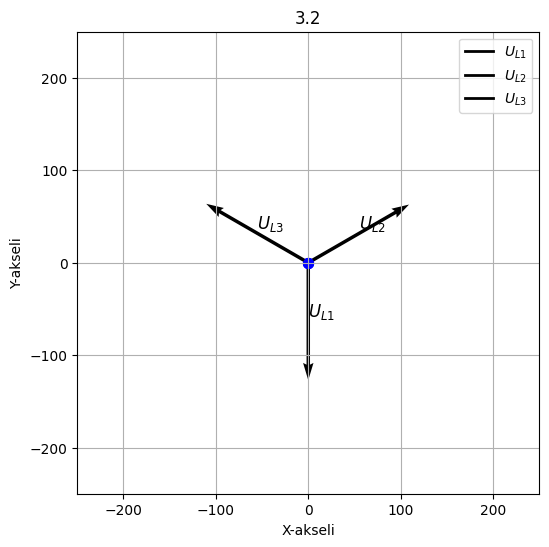

Alkupisteet (0,0) kaikille alkuperäisille vektoreille:
$U_{L1}$ päätepiste: [ 7.78875364e-15 -1.27200000e+02]
$U_{L2}$ päätepiste: [109.03259834  62.95      ]
$U_{L3}$ päätepiste: [-110.41823898   63.75      ]
Yhteinen piste: [-112.0123219    63.86608616]


In [ ]:
### 3.2 Normaali käytttötilanne

U_data = {
    "$U_{L1}$": (127.2, 0),
    "$U_{L2}$": (125.9, 120),
    "$U_{L3}$": (127.5, 240)
}

U_prime_data = {
    "$U'_{L1}$": ("$U_{L1}$", 221.6),
    "$U'_{L2}$": ("$U_{L2}$", 222.5),
    "$U'_{L3}$": ("$U_{L3}$", 0.08)
}
state = 0
voltage_vector_alignment_plot(U_data, U_prime_data, state=state, title="3.2")


***3.31 Maasta erotettu verkko, Rf = 0***

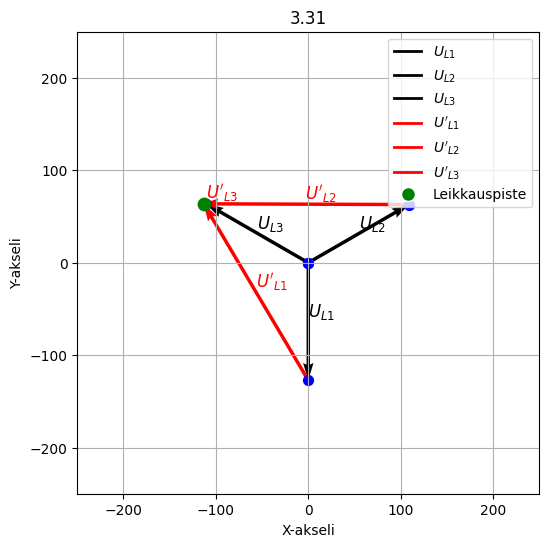

Alkupisteet (0,0) kaikille alkuperäisille vektoreille:
$U_{L1}$ päätepiste: [ 7.78875364e-15 -1.27200000e+02]
$U_{L2}$ päätepiste: [109.03259834  62.95      ]
$U_{L3}$ päätepiste: [-110.41823898   63.75      ]
Yhteinen piste: [-113.23107406   63.75673282]


In [ ]:
### 3.31 Maasta erotettu verkko, Rf = 0


U_data = {
    "$U_{L1}$": (127.2, 0),
    "$U_{L2}$": (125.9, 120),
    "$U_{L3}$": (127.5, 240)
}

U_prime_data = {
    "$U'_{L1}$": ("$U_{L1}$", 222),
    "$U'_{L2}$": ("$U_{L2}$", 225),
    "$U'_{L3}$": ("$U_{L3}$", 0.08)
}

state = 1
voltage_vector_alignment_plot(U_data, U_prime_data, state=state, title="3.31")



***3.32 Sammutettu verkko, Rf = 0***

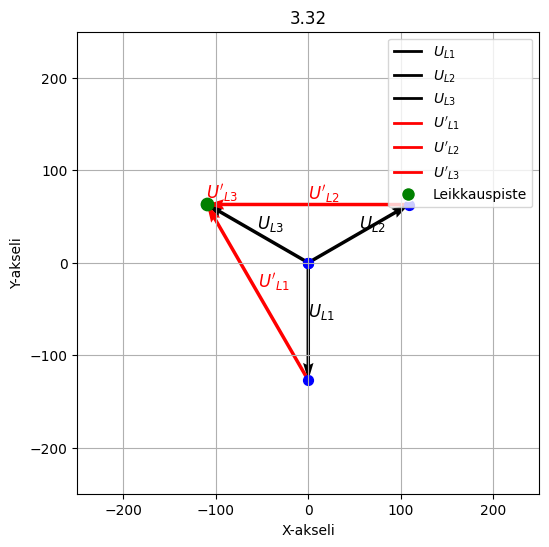

Alkupisteet (0,0) kaikille alkuperäisille vektoreille:
$U_{L1}$ päätepiste: [ 7.78875364e-15 -1.27200000e+02]
$U_{L2}$ päätepiste: [109.03259834  62.95      ]
$U_{L3}$ päätepiste: [-110.41823898   63.75      ]
Yhteinen piste: [-109.99300471   63.06047845]


In [ ]:
### 3.32 Sammutettu verkko, Rf = 0


U_data = {
    "$U_{L1}$": (127.2, 0),
    "$U_{L2}$": (125.9, 120),
    "$U_{L3}$": (127.5, 240)
}

U_prime_data = {
    "$U'_{L1}$": ("$U_{L1}$", 219),
    "$U'_{L2}$": ("$U_{L2}$", 219),
    "$U'_{L3}$": ("$U_{L3}$", 0.03)
}

state = 1
voltage_vector_alignment_plot(U_data, U_prime_data, state=state, title="3.32")



***3.41 Maasta erotettu verkko, Rf = 320 ohm***

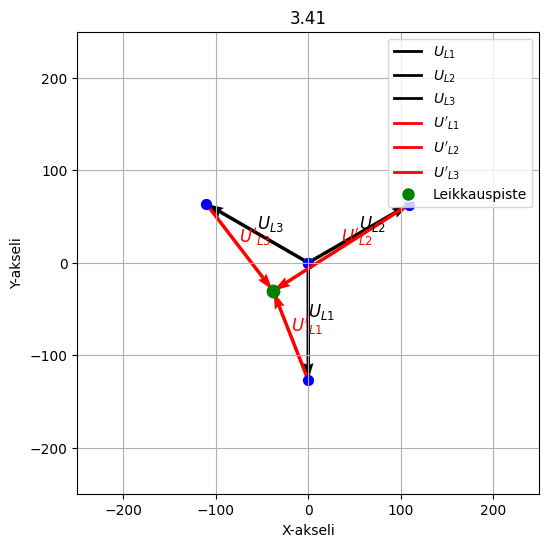

Alkupisteet (0,0) kaikille alkuperäisille vektoreille:
$U_{L1}$ päätepiste: [ 7.78875364e-15 -1.27200000e+02]
$U_{L2}$ päätepiste: [109.03259834  62.95      ]
$U_{L3}$ päätepiste: [-110.41823898   63.75      ]
Yhteinen piste: [-38.01708306 -30.52517843]


In [ ]:
### 3.41 Maasta erotettu verkko, Rf = 320 ohm


U_data = {
    "$U_{L1}$": (127.2, 0),
    "$U_{L2}$": (125.9, 120),
    "$U_{L3}$": (127.5, 240)
}

U_prime_data = {
    "$U'_{L1}$": ("$U_{L1}$", 103),
    "$U'_{L2}$": ("$U_{L2}$", 174),
    "$U'_{L3}$": ("$U_{L3}$", 118)
}

state = 1
voltage_vector_alignment_plot(U_data, U_prime_data, state=state, title="3.41")



***3.42 Sammutettu verkko, Rf = 320 W***

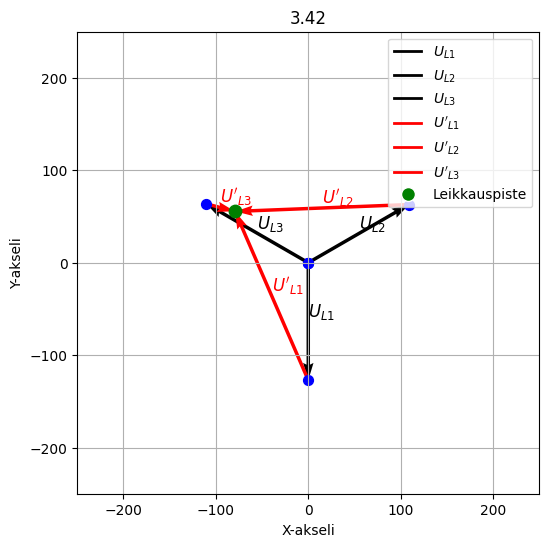

Alkupisteet (0,0) kaikille alkuperäisille vektoreille:
$U_{L1}$ päätepiste: [ 7.78875364e-15 -1.27200000e+02]
$U_{L2}$ päätepiste: [109.03259834  62.95      ]
$U_{L3}$ päätepiste: [-110.41823898   63.75      ]
Yhteinen piste: [-79.21668737  55.51443993]


In [ ]:
### 3.42 Sammutettu verkko, Rf = 320 W



U_data = {
    "$U_{L1}$": (127.2, 0),
    "$U_{L2}$": (125.9, 120),
    "$U_{L3}$": (127.5, 240)
}

U_prime_data = {
    "$U'_{L1}$": ("$U_{L1}$", 199),
    "$U'_{L2}$": ("$U_{L2}$", 188),
    "$U'_{L3}$": ("$U_{L3}$", 31.8)
}

state = 1
voltage_vector_alignment_plot(U_data, U_prime_data, state=state, title="3.42")

